<a href="https://colab.research.google.com/github/robinorex/Python-tutorial/blob/main/ML_test_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data=pd.read_csv(url)
data
#y=w*x+b
x=data["YearsExperience"]
y=data["Salary"]
y

0      36.2
1      36.6
2      42.8
3      39.3
4      46.2
5      37.7
6      43.5
7      39.8
8      56.6
9      60.1
10     54.4
11     64.4
12     57.1
13     63.2
14     55.7
15     56.9
16     57.0
17     61.1
18     67.9
19     66.0
20     83.0
21     81.3
22     93.9
23     91.7
24     98.2
25    101.3
26    113.8
27    109.4
28    105.5
29    116.9
30    112.6
31    122.3
32    121.8
Name: Salary, dtype: float64

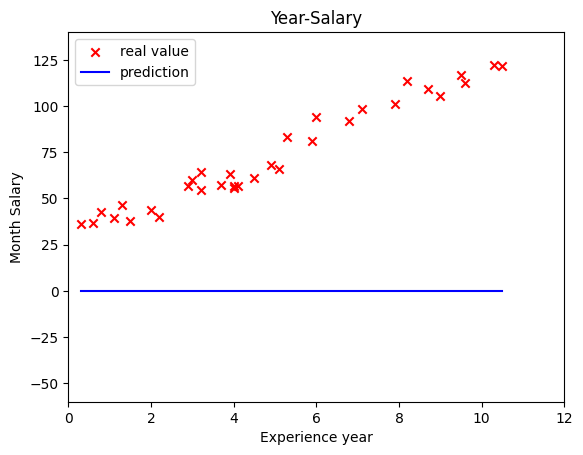

In [ ]:
import matplotlib.pyplot as plt
def plot_pred(w,b):
  plt.scatter(x,y,marker="x",color="red",label="real value")
  plt.title("Year-Salary")
  plt.xlabel("Experience year")
  plt.ylabel("Month Salary")
  y_pred=w*x+b
  plt.plot(x,y_pred,color="blue",label="prediction")
  plt.xlim([0,12])
  plt.ylim([-60,140])
  plt.legend()
  plt.show()
plot_pred(0,0)

In [ ]:
from ipywidgets import interact
interact (plot_pred, w=(-100,100,2), b=(0,30,1))

NameError: name 'plot_pred' is not defined

In [ ]:
def compute_cost(x,y,w,b):
  y_pred=w*x+b
  cost=(y-y_pred)**2
  cost=cost.sum()/len(x)
  return cost
compute_cost(x,y,10,10)

227.88121212121214

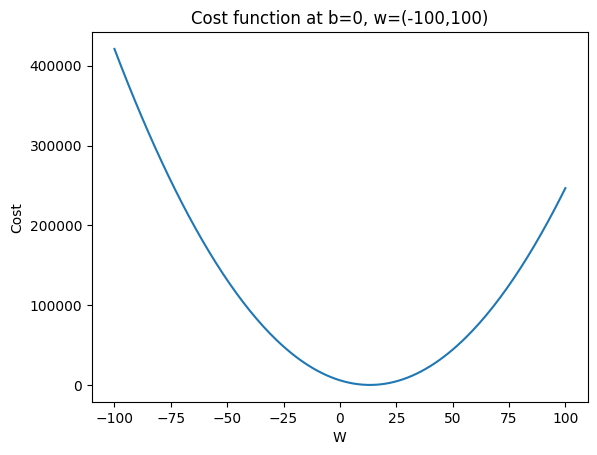

In [ ]:
#if b=0, w=(-100,100) 之間cost會是多少 ==> w & cost 比較
costs=[]
for w in range(-100,101):
  cost=compute_cost(x,y,w,0)
  costs.append(cost)
costs
# plt.scatter(range(-100,101),costs)
plt.plot(range(-100,101),costs)
plt.title("Cost function at b=0, w=(-100,100)")
plt.xlabel("W")
plt.ylabel("Cost")
plt.show()

In [ ]:
#if w=(-100,101), b=(-100,101) cost?
import numpy as np
ws=np.arange(-100,101)   #矩陣
bs=np.arange(-100,101)
costs=np.zeros((201,201))  #201個w,201個b所對應到的cost矩陣
i=0
for w in ws:
  j=0
  for b in bs:
    cost=compute_cost(x,y,w,b)
    costs[i,j]=cost
    j=j+1
  i=i+1
costs

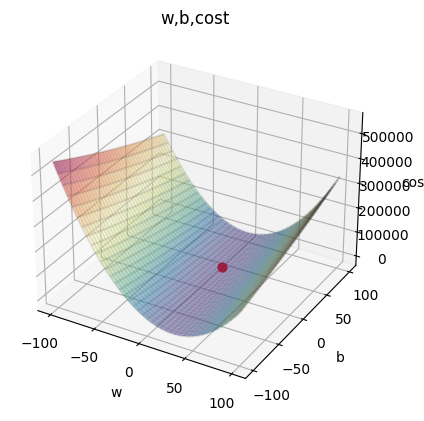

<Figure size 900x900 with 0 Axes>

when w=[9],b=[29] we get min cost:[32.69484848]


In [ ]:
ax=plt.axes(projection="3d")
# ax.view_init(0,0)
b_grid,w_grid=np.meshgrid(bs,ws)
plt.figure(figsize=(9,9))
ax.plot_surface(w_grid,b_grid,costs,cmap="Spectral_r",alpha=0.5)
ax.plot_wireframe(w_grid,b_grid,costs,color="black",alpha=0.1)  #alpha是透明度
ax.set_title("w,b,cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red",s=40)
w_index,b_index=np.where(costs==np.min(costs))
plt.show()
print(f"when w={ws[w_index]},b={bs[b_index]} we get min cost:{costs[w_index,b_index]}")  #x,y,z


In [ ]:
def compute_cost(x,y,w,b):
  y_pred=w*x+b
  cost=(y-y_pred)**2
  cost=cost.sum()/len(x)       #距離平方的平均
  return cost
compute_cost(x,y,10,10)

227.88121212121214

In [ ]:
#gradient descent
import pandas as pd
url="https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data=pd.read_csv(url)
#y=w*x+b  ==> (y-(w*x+b))**2 or  (實際值-預測值)**2
x=data["YearsExperience"]
y=data["Salary"]
def compute_gradient(x,y,w,b):
  w_gradient=(x*(w*x+b-y)).mean()  #w方向的斜率 用cost function對w微分
  b_gradient=((w*x+b-y)).mean()
  return w_gradient, b_gradient
compute_gradient(x,y,20,10)
#training
w=0  #本來自己設0,0
b=0
learning_rate=0.001
w_gradient, b_gradient=compute_gradient(x,y,w,b)
print(compute_cost(x,y,w,b))
#新的w,b值
w=w-w_gradient*learning_rate
b=b-b_gradient*learning_rate
print(compute_cost(x,y,w,b))  #成本下降了
def gradient_descent(x,y,w_init,b_init,learning_rate,cost_function,gradient_function,run_iter,p_iter=1000):
  w=w_init
  b=b_init
  c_hist=[]
  w_hist=[]
  b_hist=[]
  for i in range(run_iter):
    w_gradient, b_gradient=gradient_function(x,y,w,b)
    w=w-w_gradient*learning_rate
    b=b-b_gradient*learning_rate
    cost=cost_function(x,y,w,b)
    w_hist.append(w)
    c_hist.append(cost)
    b_hist.append(b)
    if i%p_iter==0:
      print(f"Iteration{i:5}: Cost: {cost: .2e}, W: {w: .2e}, B: {b: .2e}, w_gradient: {w_gradient: .2e}, b_gradient: {b_gradient: .2e} ")
  return w,b,w_hist,b_hist,c_hist



6040.596363636363
5656.799173956598


In [ ]:
w_init=0
b_init=0
learning_rate=1.0e-3
run_iter=20000

w_final,b_final,w_hist,b_hist,c_hist=gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter,p_iter=1000)

Iteration    0: Cost:  5.66e+03, W:  4.36e-01, B:  7.26e-02, w_gradient: -4.36e+02, b_gradient: -7.26e+01 
Iteration 1000: Cost:  1.41e+02, W:  1.21e+01, B:  8.07e+00, w_gradient:  8.00e-01, b_gradient: -5.32e+00 
Iteration 2000: Cost:  9.61e+01, W:  1.14e+01, B:  1.27e+01, w_gradient:  6.12e-01, b_gradient: -4.08e+00 
Iteration 3000: Cost:  6.97e+01, W:  1.09e+01, B:  1.63e+01, w_gradient:  4.69e-01, b_gradient: -3.12e+00 
Iteration 4000: Cost:  5.43e+01, W:  1.05e+01, B:  1.91e+01, w_gradient:  3.59e-01, b_gradient: -2.39e+00 
Iteration 5000: Cost:  4.52e+01, W:  1.02e+01, B:  2.12e+01, w_gradient:  2.75e-01, b_gradient: -1.83e+00 
Iteration 6000: Cost:  3.99e+01, W:  9.91e+00, B:  2.28e+01, w_gradient:  2.10e-01, b_gradient: -1.40e+00 
Iteration 7000: Cost:  3.68e+01, W:  9.73e+00, B:  2.40e+01, w_gradient:  1.61e-01, b_gradient: -1.07e+00 
Iteration 8000: Cost:  3.50e+01, W:  9.59e+00, B:  2.49e+01, w_gradient:  1.23e-01, b_gradient: -8.22e-01 
Iteration 9000: Cost:  3.39e+01, W:  

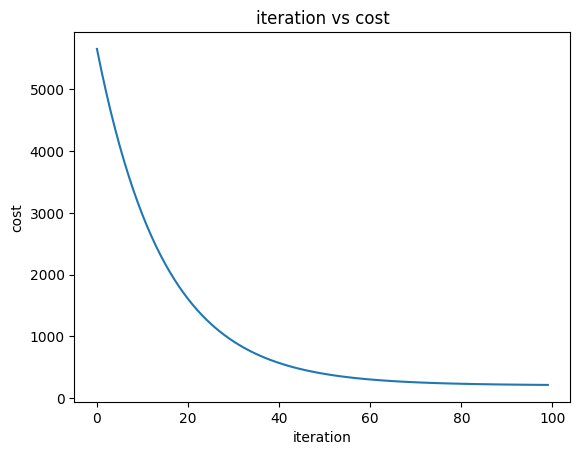

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(0,100),c_hist[:100])    #只看前100筆資料
plt.title("iteration vs cost")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.show()

In [ ]:
print(f"final w b=({w_final:.2f}, {b_final:.2f})")

final w b=(9.14, 27.89)


In [ ]:
print(f"年資5年  預測薪水{w_final*5 + b_final:.1f}K NTD")
print(f"年資10年 預測薪水{w_final*10 + b_final:.1f}K NTD")

年資5年  預測薪水73.6K NTD
年資10年 預測薪水119.3K NTD


In [ ]:
w_init=-100  #起始點更改自由設定
b_init=-100
learning_rate=1.0e-2
run_iter=1500

w_final,b_final,w_hist,b_hist,c_hist=gradient_descent(x,y,w_init,b_init,learning_rate,compute_cost,compute_gradient,run_iter,p_iter=1000)

Iteration    0: Cost:  2.42e+05, W: -5.80e+01, B: -9.34e+01, w_gradient: -4.20e+03, b_gradient: -6.61e+02 
Iteration 1000: Cost:  4.78e+01, W:  1.03e+01, B:  2.05e+01, w_gradient:  3.02e-01, b_gradient: -2.01e+00 


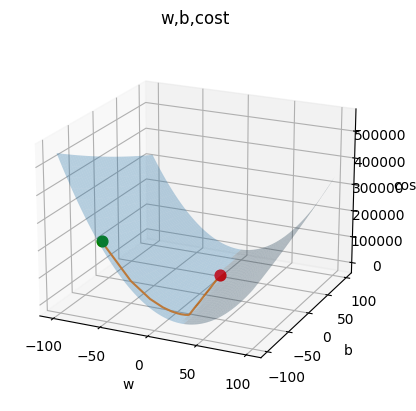

<Figure size 900x900 with 0 Axes>

when w=[9],b=[29] we get min cost:[32.69484848]


In [ ]:
import numpy as np
ws=np.arange(-100,101)   #矩陣
bs=np.arange(-100,101)
costs=np.zeros((201,201))  #201個w,201個b所對應到的cost矩陣
i=0
for w in ws:
  j=0
  for b in bs:
    cost=compute_cost(x,y,w,b)
    costs[i,j]=cost
    j=j+1
  i=i+1
costs
ax=plt.axes(projection="3d")
ax.view_init(20,-65)
b_grid,w_grid=np.meshgrid(bs,ws)
plt.figure(figsize=(9,9))
ax.plot_surface(w_grid,b_grid,costs,alpha=0.3)
ax.set_title("w,b,cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")
w_index,b_index=np.where(costs==np.min(costs))
ax.scatter(ws[w_index],bs[b_index],costs[w_index,b_index],color="red",s=60) #cost最小值
ax.scatter(w_hist[0],b_hist[0],c_hist[0],color="green",s=60)  #起始點
ax.plot(w_hist,b_hist,c_hist)
plt.show()
print(f"when w={ws[w_index]},b={bs[b_index]} we get min cost:{costs[w_index,b_index]}")  #x,y,z